<p><a href="https://colab.research.google.com/github/iurykischka/Proc.-de-sinais/blob/master/Ex/Ex07_Reamostragem_IURY.ipynb#scrollTo=g489NA4RP15-"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a>

# Ex07 - `Iury Kischka Mendes` - `0040411`

Decimação, interpolação, reamostragem.

**HONESTIDADE ACADÊMICA**

Todo o trabalho feito no sentido do cumprimento das expectativas deste curso deve ser exclusivamente seu. A colaboração de terceiros na realização dos trabalhos não é permitida.

Ver ou copiar o trabalho de outro indivíduo do curso ou retirar material de um livro, site ou outra fonte, mesmo em parte e apresentá-lo como seu próprio constitui desonestidade acadêmica, assim como mostrar ou dar a sua obra, mesmo em parte, a outro estudante. Da mesma forma, é desonestidade acadêmica fornecer ou tornar as soluções disponíveis dos trabalhos para os indivíduos que fazem ou poderão fazer este curso no futuro. Você está convidado a discutir o material do curso com os outros, a fim de melhor compreendê-lo. Você pode até discutir sobre os trabalhos com os colegas, mas você não pode compartilhar códigos, funções, projetos, tabelas, desenhos esquemáticos, mapas ou diagramas.

Você pode e deve recorrer à Web para obter referências na busca de soluções para os trabalhos, mas não por soluções definitivas para os problemas. No entanto, deve-se citar explicitamente no projeto a origem de qualquer procedimento ou técnica que você descubra fora do curso.

Todas as formas de desonestidade acadêmica são tratadas com rigor.


**Instruções:**
- Não apague os comentários que já existem nas células de código. Mas é claro que você pode adicionar outros comentários.
- Não inclua mais células do que o especificado e mantenha a organização.
- Use `plt.figure(figsize=(10,1))` para ajustar o tamanho das figuras e sempre coloque rótulos.

**Objetivos**
- Implementar compressores, expansores e reamostradores
- Analisar os efeitos no sinal no domínio do tempo e da frequência

## Registre o seu RA

Primeiro, registre o seu RA na variável indicada.


<mark>**Fazer:** Escreva o seu RA na variável `RA`.</mark>

In [130]:
### SEU CÓDIGO COMEÇA AQUI ###
RA = 40411
### FIM DO CÓDIGO ###
print(RA)

40411


**Saída esperada**:
1. Seu número de RA
---

## Sinal a ser analisado

Nesta atividade analisaremos o sinal abaixo. Analise o sinal abaixo no domínio do tempo contínuo (em segundos), no domínio do tempo discreto (em amostras), no domínio da frequência discreto (em rad/amostra) e no domínio da frequência (em Hz). Use sempre o `figsize=(10,1)`.

<mark>**Fazer:**</mark>
1. gráfico de `x` no domínio do tempo em amostras;
2. gráfico de `x` no domínio do tempo em segundos;
3. gráfico do módulo de `x` no domínio da frequência expressa em rad/amostra (não faça amplitude em dB não!);
4. gráfico do módulo de `x` no domínio da frequência expressa em Hz (não faça amplitude em dB não!).

**Dica:** escreva uma função para plotar os gráficos, pois estes mesmos gráficos serão usados posteriormente ao longo de toda a atividade.

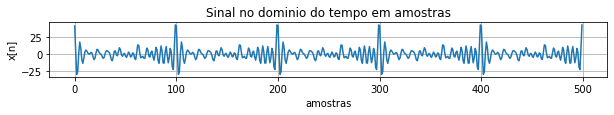

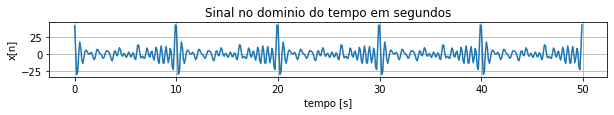

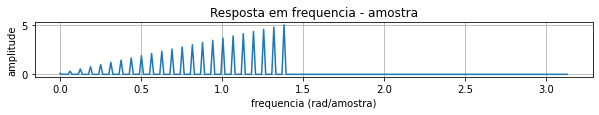

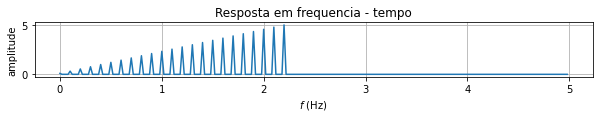

In [131]:
# Importa dados
import numpy as np, matplotlib.pyplot as plt
from scipy.fft import fft #fast Fourier Transform
from scipy import signal

# parâmetros do sinal
T = .1 #periodo de amostragem
N = 500 #tamanho do sinal
n = np.arange(N) #vetor de amostras
t = np.arange(0, N*T, T) #vetor de tempo (segundos)

# sinal a ser trabalhado
np.random.seed(RA//3)
x = np.dot(np.linspace(.1, 5, 23), np.sin(np.arange(0, .23,.01).reshape((23,1))
                                          *2*np.pi*n+np.random.uniform(0, np.pi, (23,1))) )

### SEU CÓDIGO COMEÇA AQUI ###

#FFT
def fourier(x, t, Hz=False, dB=False, deg=False, Nfft=None):

    N = len(x)
    T = t[1] - t[0]

    if Nfft == None:
      Nfft = N

    X_f = fft(x, n=Nfft)
    X_f = X_f/N # corrige amplitude do sinal
    X_f = X_f[:Nfft//2]
    X_f[1:] = 2*X_f[1:]

    if Hz == True:
      f0 = 1/(Nfft*T) #freq em Hz
      fHz = np.arange(Nfft)*f0 #freq em Hz
      f = fHz[:Nfft//2]
    else:
      w0 = 2*np.pi/(Nfft*T) #freq em rad/s
      wRad = np.arange(Nfft)*w0 #freq em rad/s
      f = wRad[:Nfft//2]

    if dB == True:
      mag = 20*np.log10(np.abs(X_f)) #modulo no dominio da frequencia em dB
    else:
      mag = np.abs(X_f) #modulo no dominio da frequencia em dB
      
    if deg == True:
      pha = np.angle(X_f, deg=1) #fase no dominio da frequencia 
    else:
      pha = np.angle(X_f, deg=0)
           
    return mag, pha, f;

#plota o sinal x gerado em amostras
plt.figure(figsize=(10,1))
plt.plot(n, x)
plt.title("Sinal no dominio do tempo em amostras")
plt.ylabel("x[n]")
plt.xlabel("amostras")
# plt.legend(["Entrada", "SaÃƒÂ­da"], loc=1)
#plt.xlim(0,0.7)
plt.grid(1);

##plota o sinal x gerado em segundos
plt.figure(figsize=(10,1))
plt.plot(t, x)
plt.title("Sinal no dominio do tempo em segundos")
plt.ylabel("x[n]")
plt.xlabel("tempo [s]")
# plt.legend(["Entrada", "SaÃƒÂ­da"], loc=1)
#plt.xlim(0,0.7)
plt.grid(1);

#passa o x pro dom. da frequencia em hertz e em rad/amostra
mag1, pha1, f1 = fourier(x, n, Hz=False, dB=False, deg=True, Nfft=None); #gera o grafico da entrada em frequencia
mag2, pha2, f2 = fourier(x, t, Hz=True, dB=False, deg=True, Nfft=None); #gera o grafico da entrada em frequencia

#plota dom. da frequencia em rad/amostra
plt.figure(figsize=(10,1))
plt.plot(f1, mag1)
plt.title("Resposta em frequencia - amostra")
plt.ylabel("amplitude")
plt.xlabel("frequencia (rad/amostra)")
#plt.xlim(0,0.7)
plt.grid(1);

#plota dom. da frequencia em hertz
plt.figure(figsize=(10,1))
plt.plot(f2, mag2)
plt.title("Resposta em frequencia - tempo")
plt.ylabel("amplitude")
plt.xlabel("$f$ (Hz)")
#plt.xlim(0,0.7)
plt.grid(1);

### FIM DO CÓDIGO ###

**Saída esperada**:
1. Gráfico do sinal no domínio do tempo em amostras
1. Gráfico do sinal no domínio do tempo em segundos
1. Gráfico do módulo da FFT do sinal (não faça em dB!), com frequências em rad/amostra
1. Gráfico do módulo da FFT do sinal (não faça em dB!), com frequências em Hz
---

## Efeito da Decimação (M=2)

<mark>**Fazer:** Faça a decimação do sinal com `M=2` e, sem implementar nenhum filtro, mostre os mesmos gráficos anteriores, mas contendo o sinal original e o sinal decimado em cada gráfico. Deve ter duas curvas em cada gráfico, uma representando `x` e outra curva para o sinal decimado.</mark>

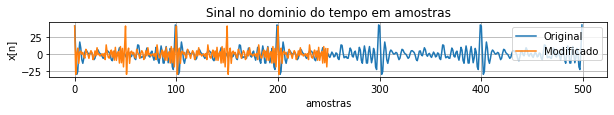

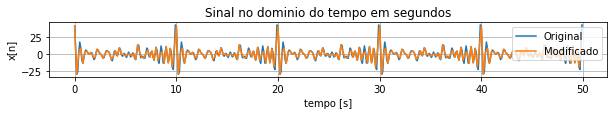

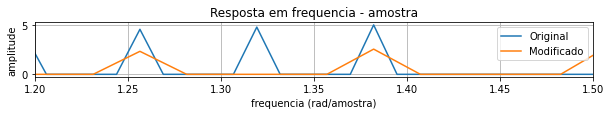

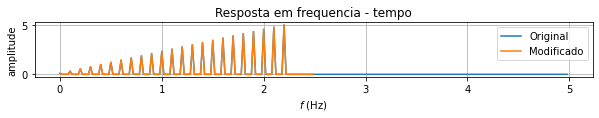

In [152]:
### SEU CÓDIGO COMEÇA AQUI ###

M = 2

xd = x[::M]
td = t[::M]
nd = np.arange(len(xd))


#Sinal no tempo em amostras
plt.figure(figsize=(10,1))
plt.plot(n, x)
plt.plot(nd, xd)
plt.title("Sinal no dominio do tempo em amostras")
plt.ylabel("x[n]")
plt.xlabel("amostras")
plt.legend(["Original", "Modificado"], loc=1)
#plt.xlim(0,0.7)
plt.grid(1);

#Sinal no tempo em segundos
plt.figure(figsize=(10,1))
plt.plot(t, x)
plt.plot(td, xd)
plt.title("Sinal no dominio do tempo em segundos")
plt.ylabel("x[n]")
plt.xlabel("tempo [s]")
plt.legend(["Original", "Modificado"], loc=1)
# plt.xlim(8,12)
plt.grid(1);

#passa o x pro dom. da frequencia em hertz e em rad/amostra
mag3, pha3, f3 = fourier(xd, nd, Hz=False, dB=False, deg=True, Nfft=None); #gera o grafico da entrada em frequencia
mag4, pha4, f4 = fourier(xd, td, Hz=True, dB=False, deg=True, Nfft=None); #gera o grafico da entrada em frequencia

#Sinal na frequencia em rad/amostra
plt.figure(figsize=(10,1))
plt.plot(f1, mag1)
plt.plot(f3, mag3)
plt.title("Resposta em frequencia - amostra")
plt.ylabel("amplitude")
plt.xlabel("frequencia (rad/amostra)")
plt.legend(["Original", "Modificado"], loc=1)
plt.xlim(1.2,1.5)
plt.grid(1);

#Sinal na frequencia em Hz
plt.figure(figsize=(10,1))
plt.plot(f2, mag2)
plt.plot(f4, mag4)
plt.title("Resposta em frequencia - tempo")
plt.ylabel("amplitude")
plt.xlabel("$f$ (Hz)")
plt.legend(["Original", "Modificado"], loc=1)
#plt.xlim(0,0.7)
plt.grid(1);

### FIM DO CÓDIGO ###

**Saída esperada**:
1. Gráfico do sinal original e modificado no domínio do tempo em amostras
1. Gráfico do sinal original e modificado no domínio do tempo em segundos
1. Gráfico do módulo da FFT do sinal original e modificado (não faça em dB!), com frequências em rad/amostra
1. Gráfico do módulo da FFT do sinal original e modificado (não faça em dB!), com frequências em Hz
---

## Efeito da Decimação (M=3)

<mark>**Fazer:** Faça a decimação do sinal com `M=3` e, sem implementar nenhum filtro, mostre os mesmos gráficos anteriores, mas contendo o sinal original e o sinal decimado em cada gráfico. Deve ter duas curvas em cada gráfico, uma representando `x` e outra curva para o sinal decimado.</mark>

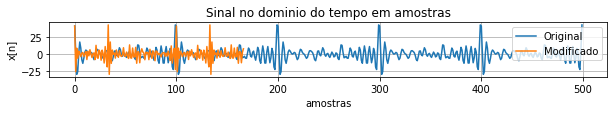

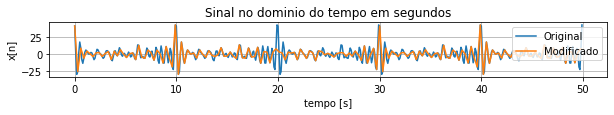

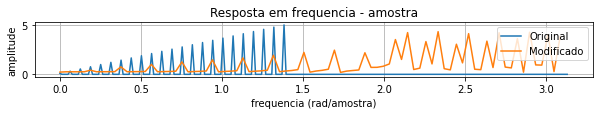

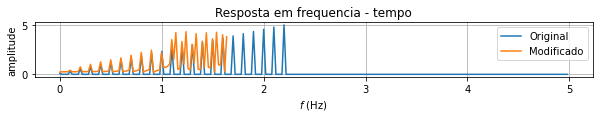

In [133]:
### SEU CÓDIGO COMEÇA AQUI ###

M = 3

xd = x[::M]
td = t[::M]
nd = np.arange(len(xd))


#Sinal no tempo em amostras
plt.figure(figsize=(10,1))
plt.plot(n, x)
plt.plot(nd, xd)
plt.title("Sinal no dominio do tempo em amostras")
plt.ylabel("x[n]")
plt.xlabel("amostras")
plt.legend(["Original", "Modificado"], loc=1)
#plt.xlim(0,0.7)
plt.grid(1);

#Sinal no tempo em segundos
plt.figure(figsize=(10,1))
plt.plot(t, x)
plt.plot(td, xd)
plt.title("Sinal no dominio do tempo em segundos")
plt.ylabel("x[n]")
plt.xlabel("tempo [s]")
plt.legend(["Original", "Modificado"], loc=1)
#plt.xlim(0,0.7)
plt.grid(1);

#passa o x pro dom. da frequencia em hertz e em rad/amostra
mag3, pha3, f3 = fourier(xd, nd, Hz=False, dB=False, deg=True, Nfft=None); #gera o grafico da entrada em frequencia
mag4, pha4, f4 = fourier(xd, td, Hz=True, dB=False, deg=True, Nfft=None); #gera o grafico da entrada em frequencia

#Sinal na frequencia em rad/amostra
plt.figure(figsize=(10,1))
plt.plot(f1, mag1)
plt.plot(f3, mag3)
plt.title("Resposta em frequencia - amostra")
plt.ylabel("amplitude")
plt.xlabel("frequencia (rad/amostra)")
plt.legend(["Original", "Modificado"], loc=1)
#plt.xlim(0,0.7)
plt.grid(1);

#Sinal na frequencia em Hz
plt.figure(figsize=(10,1))
plt.plot(f2, mag2)
plt.plot(f4, mag4)
plt.title("Resposta em frequencia - tempo")
plt.ylabel("amplitude")
plt.xlabel("$f$ (Hz)")
plt.legend(["Original", "Modificado"], loc=1)
#plt.xlim(0,0.7)
plt.grid(1);

### FIM DO CÓDIGO ###

**Saída esperada**:
1. Gráfico do sinal original e modificado no domínio do tempo em amostras
1. Gráfico do sinal original e modificado no domínio do tempo em segundos
1. Gráfico do módulo da FFT do sinal original e modificado (não faça em dB!), com frequências em rad/amostra
1. Gráfico do módulo da FFT do sinal original e modificado (não faça em dB!), com frequências em Hz
---

## Decimação usando `signal.decimate` e `signal.resample` (M=3)

<mark>**Fazer:** Faça a decimação do sinal com `M=3` usando `signal.decimate` ou `signal.resample`. Mostre os mesmos gráficos anteriores, mas contendo o sinal original e o sinal decimado em cada gráfico. Deve ter duas curvas em cada gráfico, uma representando `x` e outra curva para o sinal decimado.</mark>

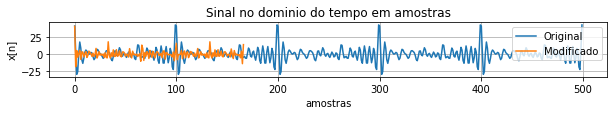

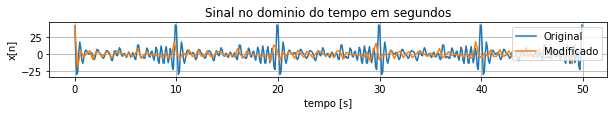

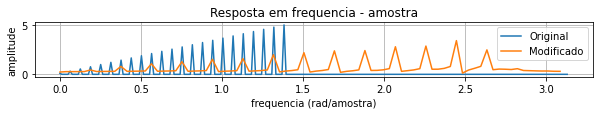

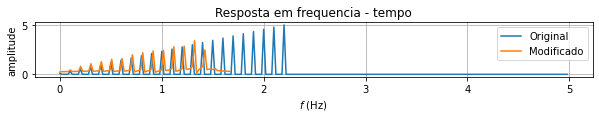

In [134]:
### SEU CÓDIGO COMEÇA AQUI ###

M = 3

xd = signal.decimate(x, M, n=None, ftype='iir', axis=- 1, zero_phase=True)
td = signal.decimate(t, M, n=None, ftype='iir', axis=- 1, zero_phase=True)
nd = np.arange(len(xd))


#Sinal no tempo em amostras
plt.figure(figsize=(10,1))
plt.plot(n, x)
plt.plot(nd, xd)
plt.title("Sinal no dominio do tempo em amostras")
plt.ylabel("x[n]")
plt.xlabel("amostras")
plt.legend(["Original", "Modificado"], loc=1)
#plt.xlim(0,0.7)
plt.grid(1);

#Sinal no tempo em segundos
plt.figure(figsize=(10,1))
plt.plot(t, x)
plt.plot(td, xd)
plt.title("Sinal no dominio do tempo em segundos")
plt.ylabel("x[n]")
plt.xlabel("tempo [s]")
plt.legend(["Original", "Modificado"], loc=1)
#plt.xlim(0,0.7)
plt.grid(1);

#passa o x pro dom. da frequencia em hertz e em rad/amostra
mag3, pha3, f3 = fourier(xd, nd, Hz=False, dB=False, deg=True, Nfft=None); #gera o grafico da entrada em frequencia
mag4, pha4, f4 = fourier(xd, td, Hz=True, dB=False, deg=True, Nfft=None); #gera o grafico da entrada em frequencia

#Sinal na frequencia em rad/amostra
plt.figure(figsize=(10,1))
plt.plot(f1, mag1)
plt.plot(f3, mag3)
plt.title("Resposta em frequencia - amostra")
plt.ylabel("amplitude")
plt.xlabel("frequencia (rad/amostra)")
plt.legend(["Original", "Modificado"], loc=1)
#plt.xlim(0,0.7)
plt.grid(1);

#Sinal na frequencia em Hz
plt.figure(figsize=(10,1))
plt.plot(f2, mag2)
plt.plot(f4, mag4)
plt.title("Resposta em frequencia - tempo")
plt.ylabel("amplitude")
plt.xlabel("$f$ (Hz)")
plt.legend(["Original", "Modificado"], loc=1)
#plt.xlim(0,0.7)
plt.grid(1);

### FIM DO CÓDIGO ###

**Saída esperada**:
1. Gráfico do sinal original e modificado no domínio do tempo em amostras
1. Gráfico do sinal original e modificado no domínio do tempo em segundos
1. Gráfico do módulo da FFT do sinal original e modificado (não faça em dB!), com frequências em rad/amostra
1. Gráfico do módulo da FFT do sinal original e modificado (não faça em dB!), com frequências em Hz
---

## Superamostragem (L=2)

Antes de implementar a superamostragem, rode o código abaixo e veja como ele pode te ajudar a implementar o superamostrador.

In [135]:
# Exemplo do uso de "np.kron" para adicionar zeros entre amostras
sinal = np.arange(1, 10)
modificacao = [1, 0, 0] # <-- altere essa variável para [1, 0, 0] e veja o que acontece
print(sinal)
print(np.kron(sinal, modificacao))

[1 2 3 4 5 6 7 8 9]
[1 0 0 2 0 0 3 0 0 4 0 0 5 0 0 6 0 0 7 0 0 8 0 0 9 0 0]


<mark>**Fazer:** Faça a superamostragem do sinal com `L=2`, sem usar nenhum filtro. Mostre os mesmos gráficos anteriores, mas contendo o sinal original e o sinal modificado em cada gráfico. Deve ter duas curvas em cada gráfico, uma representando `x` e outra curva para o sinal com taxa de amostragem alterada.</mark>

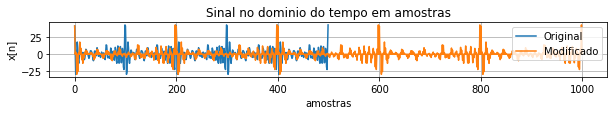

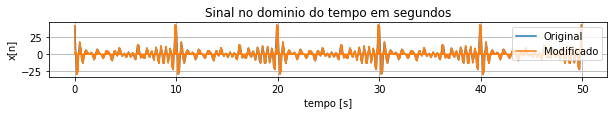

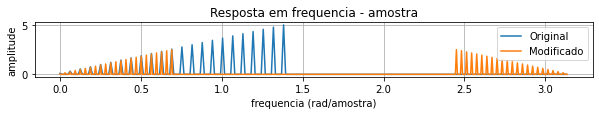

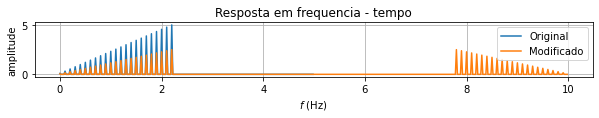

In [136]:
### SEU CÓDIGO COMEÇA AQUI ###

L = 2

xd = np.kron(x, [1,0])
td = np.arange(0, (L*N)*(T/L), T/L)
nd = np.arange(len(xd))


#Sinal no tempo em amostras
plt.figure(figsize=(10,1))
plt.plot(n, x)
plt.plot(nd, xd)
plt.title("Sinal no dominio do tempo em amostras")
plt.ylabel("x[n]")
plt.xlabel("amostras")
plt.legend(["Original", "Modificado"], loc=1)
#plt.xlim(0,0.7)
plt.grid(1);

#Sinal no tempo em segundos
plt.figure(figsize=(10,1))
plt.plot(t, x)
plt.plot(td, xd)
plt.title("Sinal no dominio do tempo em segundos")
plt.ylabel("x[n]")
plt.xlabel("tempo [s]")
plt.legend(["Original", "Modificado"], loc=1)
#plt.xlim(0,0.7)
plt.grid(1);

#passa o x pro dom. da frequencia em hertz e em rad/amostra
mag3, pha3, f3 = fourier(xd, nd, Hz=False, dB=False, deg=True, Nfft=None); #gera o grafico da entrada em frequencia
mag4, pha4, f4 = fourier(xd, td, Hz=True, dB=False, deg=True, Nfft=None); #gera o grafico da entrada em frequencia

#Sinal na frequencia em rad/amostra
plt.figure(figsize=(10,1))
plt.plot(f1, mag1)
plt.plot(f3, mag3)
plt.title("Resposta em frequencia - amostra")
plt.ylabel("amplitude")
plt.xlabel("frequencia (rad/amostra)")
plt.legend(["Original", "Modificado"], loc=1)
#plt.xlim(0,0.7)
plt.grid(1);

#Sinal na frequencia em Hz
plt.figure(figsize=(10,1))
plt.plot(f2, mag2)
plt.plot(f4, mag4)
plt.title("Resposta em frequencia - tempo")
plt.ylabel("amplitude")
plt.xlabel("$f$ (Hz)")
plt.legend(["Original", "Modificado"], loc=1)
#plt.xlim(0,0.7)
plt.grid(1);


### FIM DO CÓDIGO ###

**Saída esperada**:
1. Gráfico do sinal original e modificado no domínio do tempo em amostras
1. Gráfico do sinal original e modificado no domínio do tempo em segundos
1. Gráfico do módulo da FFT do sinal original e modificado (não faça em dB!), com frequências em rad/amostra
1. Gráfico do módulo da FFT do sinal original e modificado (não faça em dB!), com frequências em Hz
---

## Efeito da superamostragem (L=4)

<mark>**Fazer:** Faça a superamostragem do sinal com `L=4`, sem usar nenhum filtro. Mostre os mesmos gráficos anteriores, mas contendo o sinal original e o sinal modificado em cada gráfico. Deve ter duas curvas em cada gráfico, uma representando `x` e outra curva para o sinal com taxa de amostragem alterada.</mark>

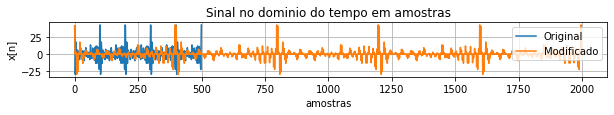

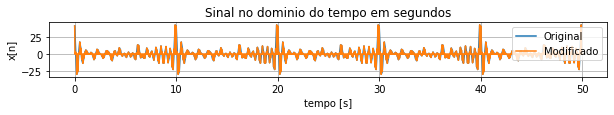

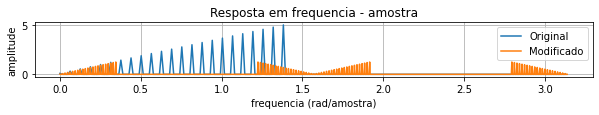

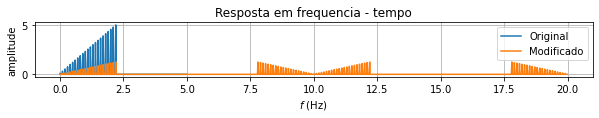

In [137]:
### SEU CÓDIGO COMEÇA AQUI ###

L = 4

xd = np.kron(x, [1,0,0,0])
td = np.arange(0, (L*N)*(T/L), T/L)
nd = np.arange(len(xd))


#Sinal no tempo em amostras
plt.figure(figsize=(10,1))
plt.plot(n, x)
plt.plot(nd, xd)
plt.title("Sinal no dominio do tempo em amostras")
plt.ylabel("x[n]")
plt.xlabel("amostras")
plt.legend(["Original", "Modificado"], loc=1)
#plt.xlim(0,0.7)
plt.grid(1);

#Sinal no tempo em segundos
plt.figure(figsize=(10,1))
plt.plot(t, x)
plt.plot(td, xd)
plt.title("Sinal no dominio do tempo em segundos")
plt.ylabel("x[n]")
plt.xlabel("tempo [s]")
plt.legend(["Original", "Modificado"], loc=1)
#plt.xlim(0,0.7)
plt.grid(1);

#passa o x pro dom. da frequencia em hertz e em rad/amostra
mag3, pha3, f3 = fourier(xd, nd, Hz=False, dB=False, deg=True, Nfft=None); #gera o grafico da entrada em frequencia
mag4, pha4, f4 = fourier(xd, td, Hz=True, dB=False, deg=True, Nfft=None); #gera o grafico da entrada em frequencia

#Sinal na frequencia em rad/amostra
plt.figure(figsize=(10,1))
plt.plot(f1, mag1)
plt.plot(f3, mag3)
plt.title("Resposta em frequencia - amostra")
plt.ylabel("amplitude")
plt.xlabel("frequencia (rad/amostra)")
plt.legend(["Original", "Modificado"], loc=1)
#plt.xlim(0,0.7)
plt.grid(1);

#Sinal na frequencia em Hz
plt.figure(figsize=(10,1))
plt.plot(f2, mag2)
plt.plot(f4, mag4)
plt.title("Resposta em frequencia - tempo")
plt.ylabel("amplitude")
plt.xlabel("$f$ (Hz)")
plt.legend(["Original", "Modificado"], loc=1)
#plt.xlim(0,0.7)
plt.grid(1);


### FIM DO CÓDIGO ###

**Saída esperada**:
1. Gráfico do sinal original e modificado no domínio do tempo em amostras
1. Gráfico do sinal original e modificado no domínio do tempo em segundos
1. Gráfico do módulo da FFT do sinal original e modificado (não faça em dB!), com frequências em rad/amostra
1. Gráfico do módulo da FFT do sinal original e modificado (não faça em dB!), com frequências em Hz
---

## Interpolação usando `signal.resample` (L=4)

<mark>**Fazer:** Faça a expansão do sinal com `L=4` usando comando `signal.resample`. Mostre os mesmos gráficos anteriores, mas contendo o sinal original e o sinal modificado em cada gráfico. Deve ter duas curvas em cada gráfico, uma representando `x` e outra curva para o sinal com taxa de amostragem alterada.</mark>

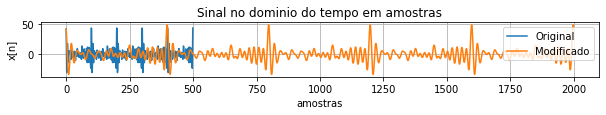

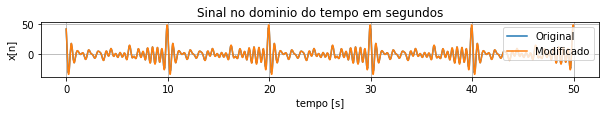

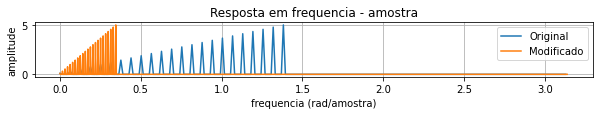

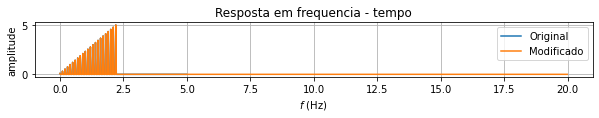

In [138]:
### SEU CÓDIGO COMEÇA AQUI ###

L = 4

xd = signal.resample(x, N*L, t=None, axis=0, window=None, domain='time') #N*L é o numero final de amostras (numero de amostras*fator de superamostragem)
nd = np.arange(len(xd))


#Sinal no tempo em amostras
plt.figure(figsize=(10,1))
plt.plot(n, x)
plt.plot(nd, xd)
plt.title("Sinal no dominio do tempo em amostras")
plt.ylabel("x[n]")
plt.xlabel("amostras")
plt.legend(["Original", "Modificado"], loc=1)
#plt.xlim(0,0.7)
plt.grid(1);

#Sinal no tempo em segundos
plt.figure(figsize=(10,1))
plt.plot(t, x)
plt.plot(td, xd)
plt.title("Sinal no dominio do tempo em segundos")
plt.ylabel("x[n]")
plt.xlabel("tempo [s]")
plt.legend(["Original", "Modificado"], loc=1)
#plt.xlim(0,0.7)
plt.grid(1);

#passa o x pro dom. da frequencia em hertz e em rad/amostra
mag3, pha3, f3 = fourier(xd, nd, Hz=False, dB=False, deg=True, Nfft=None); #gera o grafico da entrada em frequencia
mag4, pha4, f4 = fourier(xd, td, Hz=True, dB=False, deg=True, Nfft=None); #gera o grafico da entrada em frequencia

#Sinal na frequencia em rad/amostra
plt.figure(figsize=(10,1))
plt.plot(f1, mag1)
plt.plot(f3, mag3)
plt.title("Resposta em frequencia - amostra")
plt.ylabel("amplitude")
plt.xlabel("frequencia (rad/amostra)")
plt.legend(["Original", "Modificado"], loc=1)
#plt.xlim(0,0.7)
plt.grid(1);

#Sinal na frequencia em Hz
plt.figure(figsize=(10,1))
plt.plot(f2, mag2)
plt.plot(f4, mag4)
plt.title("Resposta em frequencia - tempo")
plt.ylabel("amplitude")
plt.xlabel("$f$ (Hz)")
plt.legend(["Original", "Modificado"], loc=1)
#plt.xlim(0,0.7)
plt.grid(1);


### FIM DO CÓDIGO ###

**Saída esperada**:
1. Gráfico do sinal original e modificado no domínio do tempo em amostras
1. Gráfico do sinal original e modificado no domínio do tempo em segundos
1. Gráfico do módulo da FFT do sinal original e modificado (não faça em dB!), com frequências em rad/amostra
1. Gráfico do módulo da FFT do sinal original e modificado (não faça em dB!), com frequências em Hz
---

## Amostragem por fator não inteiro usando `signal.resample` (L=4, M=3)

<mark>**Fazer:** Faça a mudança na taxa de amostragem do sinal com `L=4` e `M=3` usando comando `signal.resample`. Mostre os mesmos gráficos anteriores, mas contendo o sinal original e o sinal modificado em cada gráfico. Deve ter duas curvas em cada gráfico, uma representando `x` e outra curva para o sinal com taxa de amostragem alterada.</mark>

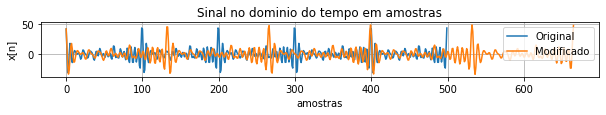

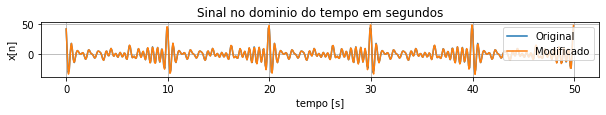

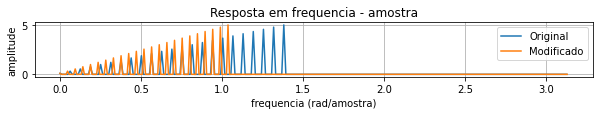

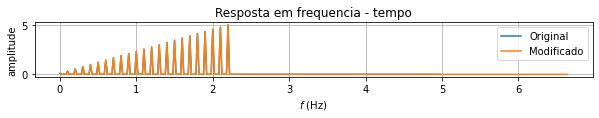

In [139]:
### SEU CÓDIGO COMEÇA AQUI ###

L = 4
M = 3

xd, td = signal.resample(x, int((N*L)/M), t=t, axis=0, window=None, domain='time') #N*L é o numero final de amostras (numero de amostras*fator de superamostragem)
nd = np.arange(len(xd))


#Sinal no tempo em amostras
plt.figure(figsize=(10,1))
plt.plot(n, x)
plt.plot(nd, xd)
plt.title("Sinal no dominio do tempo em amostras")
plt.ylabel("x[n]")
plt.xlabel("amostras")
plt.legend(["Original", "Modificado"], loc=1)
#plt.xlim(0,0.7)
plt.grid(1);

#Sinal no tempo em segundos
plt.figure(figsize=(10,1))
plt.plot(t, x)
plt.plot(td, xd)
plt.title("Sinal no dominio do tempo em segundos")
plt.ylabel("x[n]")
plt.xlabel("tempo [s]")
plt.legend(["Original", "Modificado"], loc=1)
#plt.xlim(0,0.7)
plt.grid(1);

#passa o x pro dom. da frequencia em hertz e em rad/amostra
mag3, pha3, f3 = fourier(xd, nd, Hz=False, dB=False, deg=True, Nfft=None); #gera o grafico da entrada em frequencia
mag4, pha4, f4 = fourier(xd, td, Hz=True, dB=False, deg=True, Nfft=None); #gera o grafico da entrada em frequencia

#Sinal na frequencia em rad/amostra
plt.figure(figsize=(10,1))
plt.plot(f1, mag1)
plt.plot(f3, mag3)
plt.title("Resposta em frequencia - amostra")
plt.ylabel("amplitude")
plt.xlabel("frequencia (rad/amostra)")
plt.legend(["Original", "Modificado"], loc=1)
#plt.xlim(0,0.7)
plt.grid(1);

#Sinal na frequencia em Hz
plt.figure(figsize=(10,1))
plt.plot(f2, mag2)
plt.plot(f4, mag4)
plt.title("Resposta em frequencia - tempo")
plt.ylabel("amplitude")
plt.xlabel("$f$ (Hz)")
plt.legend(["Original", "Modificado"], loc=1)
#plt.xlim(0,0.7)
plt.grid(1);


### FIM DO CÓDIGO ###

**Saída esperada**:
1. Gráfico do sinal original e modificado no domínio do tempo em amostras
1. Gráfico do sinal original e modificado no domínio do tempo em segundos
1. Gráfico do módulo da FFT do sinal original e modificado (não faça em dB!), com frequências em rad/amostra
1. Gráfico do módulo da FFT do sinal original e modificado (não faça em dB!), com frequências em Hz
---

## Amostragem por fator não inteiro usando `signal.resample_poly` (L=3, M=4)

<mark>**Fazer:** Faça a mudança na taxa de amostragem do sinal com `L=3` e `M=4` usando comando `signal.resample`. Mostre os mesmos gráficos anteriores, mas contendo o sinal original e o sinal modificado em cada gráfico. Deve ter duas curvas em cada gráfico, uma representando `x` e outra curva para o sinal com taxa de amostragem alterada.</mark>

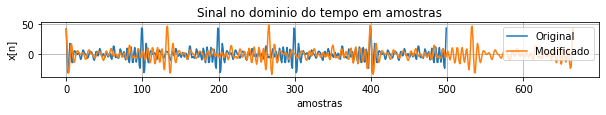

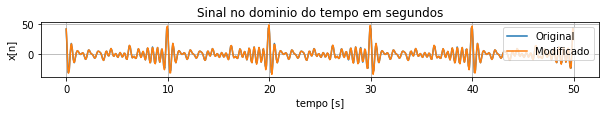

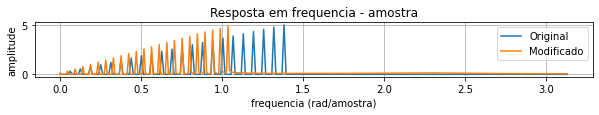

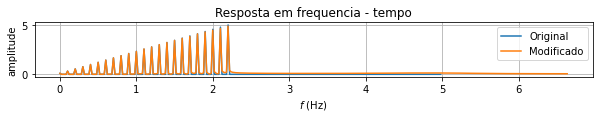

In [142]:
### SEU CÓDIGO COMEÇA AQUI ###
######                            DECOMPOSIÇÃO POLIFASICA - SINAIS DE TEMPO DISCRETO - paralelizar processamento de reamostragem
### SEU CÓDIGO COMEÇA AQUI ###

L = 4
M = 3

# xd, td = signal.resample(x, int((N*L)/M), t=t, axis=0, window=None, domain='time') #N*L é o numero final de amostras (numero de amostras*fator de superamostragem)
# nd = np.arange(len(xd))

#Realiza a decomposição polifásica
xd = signal.resample_poly(x, L, M, axis=0, window=('kaiser', 5.0), padtype='constant', cval=None)
nd = np.arange(len(xd))

#redimensiona vetor temporal de acordo com a mudança na taxa de amostragem que ocorre ao decompor o sinal
td = np.arange(0, N*T, T*(M/L)) 

#Sinal no tempo em amostras
plt.figure(figsize=(10,1))
plt.plot(n, x)
plt.plot(nd, xd)
plt.title("Sinal no dominio do tempo em amostras")
plt.ylabel("x[n]")
plt.xlabel("amostras")
plt.legend(["Original", "Modificado"], loc=1)
#plt.xlim(0,0.7)
plt.grid(1);

#Sinal no tempo em segundos
plt.figure(figsize=(10,1))
plt.plot(t, x)
plt.plot(td, xd)
plt.title("Sinal no dominio do tempo em segundos")
plt.ylabel("x[n]")
plt.xlabel("tempo [s]")
plt.legend(["Original", "Modificado"], loc=1)
#plt.xlim(0,0.7)
plt.grid(1);

#passa o x pro dom. da frequencia em hertz e em rad/amostra
mag3, pha3, f3 = fourier(xd, nd, Hz=False, dB=False, deg=True, Nfft=None); #gera o grafico da entrada em frequencia
mag4, pha4, f4 = fourier(xd, td, Hz=True, dB=False, deg=True, Nfft=None); #gera o grafico da entrada em frequencia

#Sinal na frequencia em rad/amostra
plt.figure(figsize=(10,1))
plt.plot(f1, mag1)
plt.plot(f3, mag3)
plt.title("Resposta em frequencia - amostra")
plt.ylabel("amplitude")
plt.xlabel("frequencia (rad/amostra)")
plt.legend(["Original", "Modificado"], loc=1)
#plt.xlim(0,0.7)
plt.grid(1);

#Sinal na frequencia em Hz
plt.figure(figsize=(10,1))
plt.plot(f2, mag2)
plt.plot(f4, mag4)
plt.title("Resposta em frequencia - tempo")
plt.ylabel("amplitude")
plt.xlabel("$f$ (Hz)")
plt.legend(["Original", "Modificado"], loc=1)
#plt.xlim(0,0.7)
plt.grid(1);


### FIM DO CÓDIGO ###

**Saída esperada**:
1. Gráfico do sinal original e modificado no domínio do tempo em amostras
1. Gráfico do sinal original e modificado no domínio do tempo em segundos
1. Gráfico do módulo da FFT do sinal original e modificado (não faça em dB!), com frequências em rad/amostra
1. Gráfico do módulo da FFT do sinal original e modificado (não faça em dB!), com frequências em Hz
___

# Concluões: responda às questões abaixo

**1 - Qual o efeito da subamostragem? O que é feito para mitigar o efeito gerado? Responda citando os gráficos gerados na atividade.**

**Resposta:**

` 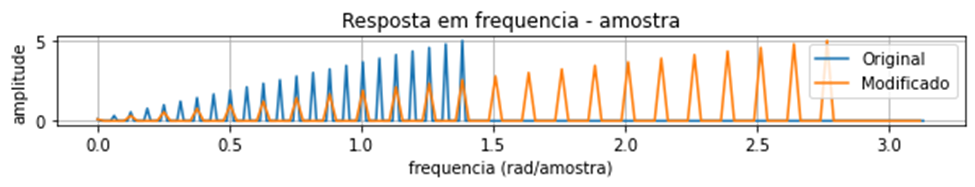

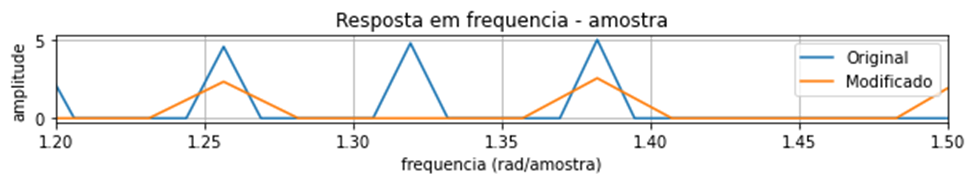
 
O sinal é esticado no domínio da freq. (rad/amostra), e este esticamento pode fazer com que uma amostra interfira na outra, caso o esticamento for maior que o suportado pelo sinal, causando o que é denominado Aliasing, que é a perda de informação, e para corrigi-lo, o sinal deve ser passado por um filtro anti-aliasing (passa-baixa de ganho unitário).
`

**2 - Qual o efeito da superamostragem? O que é feito para mitigar o efeito indesejado? Responda citando os gráficos gerados na atividade.**

**Resposta:**

`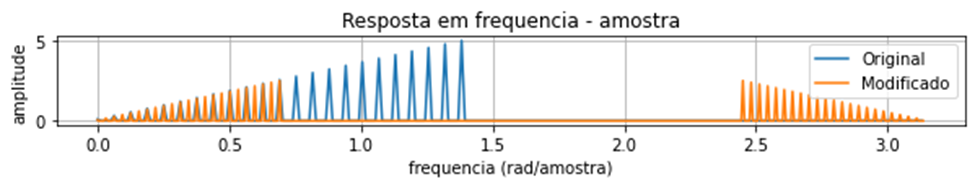

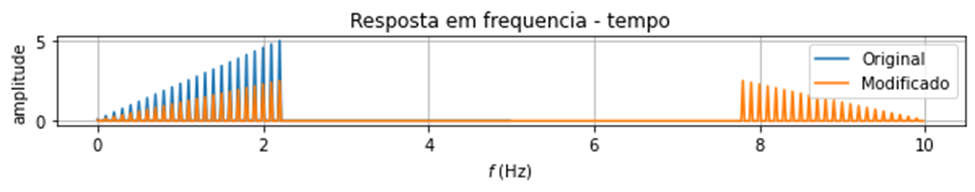

Aparece réplica espelhada do sinal na região de alta frequência, dividindo sua energia entre as duas partes, o que explica a menor amplitude. Isso pode ser resolvido passando o sinal por uma combinação em cascata de um expansor (interpolador) e um compressor (decimador).`